In [3]:
#!/usr/bin/env python3
#@author narumeena
#@Description applying bayesian optimization to diffrent methods 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#split 
from sklearn.model_selection import train_test_split
#bayesian optimization 
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#hyperpot
from hpsklearn import HyperoptEstimator, random_forest
from hyperopt import tpe
%matplotlib inline

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [5]:
filtredAttributes = pd.read_csv("../analysis/trainingDataSet/case_control_filtred.csv", sep=",")
filtredAttributes.shape

(138665, 74)

In [6]:
filtredAttributes.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [7]:
# One-hot encode the data using pandas get_dummies
filtredAttributes = pd.get_dummies(filtredAttributes)

In [8]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0         1
1         1
2         1
3         1
4         1
         ..
138660    0
138661    0
138662    0
138663    0
138664    0
Name: category, Length: 138665, dtype: int64

In [9]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [11]:
X_train

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
42192,0.596,0.067,20,10,0.980,0.985,1.000,0.595,2.963,7.708,...,0,0,0,0,0,0,0,0,0,1
46590,0.391,0.013,1915,1832,0.963,1.000,1.000,0.475,3.370,8.687,...,0,0,0,1,0,0,0,0,0,0
78842,0.483,0.013,110247,414677,0.002,0.000,0.000,0.418,-0.820,-0.780,...,0,1,0,0,0,0,0,0,0,0
48882,0.464,0.053,952,306,0.979,0.998,1.000,0.595,1.325,4.270,...,0,0,0,0,0,0,0,0,0,1
33305,0.636,0.027,285,450,0.954,1.000,1.000,0.595,4.396,8.427,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.384,0.000,33269,92255,0.032,0.000,0.000,0.475,-0.733,-0.731,...,0,1,0,0,0,0,0,0,0,0
65615,0.464,0.013,22224,17929,0.000,0.000,0.000,-0.393,-1.784,-1.712,...,0,1,0,0,0,0,0,0,0,0
77655,0.424,0.013,2194,687,0.112,0.957,0.998,-1.347,0.129,0.894,...,0,0,0,0,0,0,0,0,0,1
56088,0.530,0.053,669,90,0.212,0.376,1.000,0.391,2.680,7.282,...,0,1,0,0,0,0,0,0,0,0


In [12]:
X_test

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
50396,0.550,0.053,1230,2417,0.892,0.998,1.000,0.475,3.370,8.297,...,0,0,0,0,1,0,0,0,0,0
137354,0.311,0.000,95605,124858,0.108,0.082,0.094,0.321,0.509,0.531,...,1,0,0,0,0,0,0,0,0,0
762,0.603,0.080,12507,34,0.879,0.997,1.000,0.595,4.494,10.822,...,0,0,0,1,0,0,0,0,0,0
115930,0.338,0.000,217179,47779,0.006,0.000,0.000,-1.256,-0.358,-0.336,...,0,1,0,0,0,0,0,0,0,0
129449,0.702,0.067,75,810,0.009,0.025,0.000,-0.478,-0.349,-0.883,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37497,0.583,0.040,890,814,0.905,1.000,0.989,-0.188,0.730,0.503,...,1,0,0,0,0,0,0,0,0,0
96729,0.397,0.013,1989,17555,0.010,0.000,0.001,0.595,0.191,0.276,...,0,0,0,0,0,0,0,0,0,1
82346,0.517,0.080,5868,25079,0.000,0.000,0.000,-0.000,-0.000,-0.000,...,0,1,0,0,0,0,0,0,0,0
62602,0.669,0.107,11660,2175,0.992,1.000,1.000,0.576,4.481,11.283,...,0,0,0,0,1,0,0,0,0,0


In [13]:
Y_train

42192    1
46590    1
78842    0
48882    1
33305    1
        ..
82270    0
65615    0
77655    0
56088    1
38408    1
Name: category, Length: 103998, dtype: int64

In [14]:
Y_test

50396     1
137354    0
762       1
115930    0
129449    0
         ..
37497     1
96729     0
82346     0
62602     1
100989    0
Name: category, Length: 34667, dtype: int64

In [15]:
#import necessary libraries
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(learning_rate = 0.05,
 n_estimators=300,
 max_depth=5)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [19]:

# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.08%


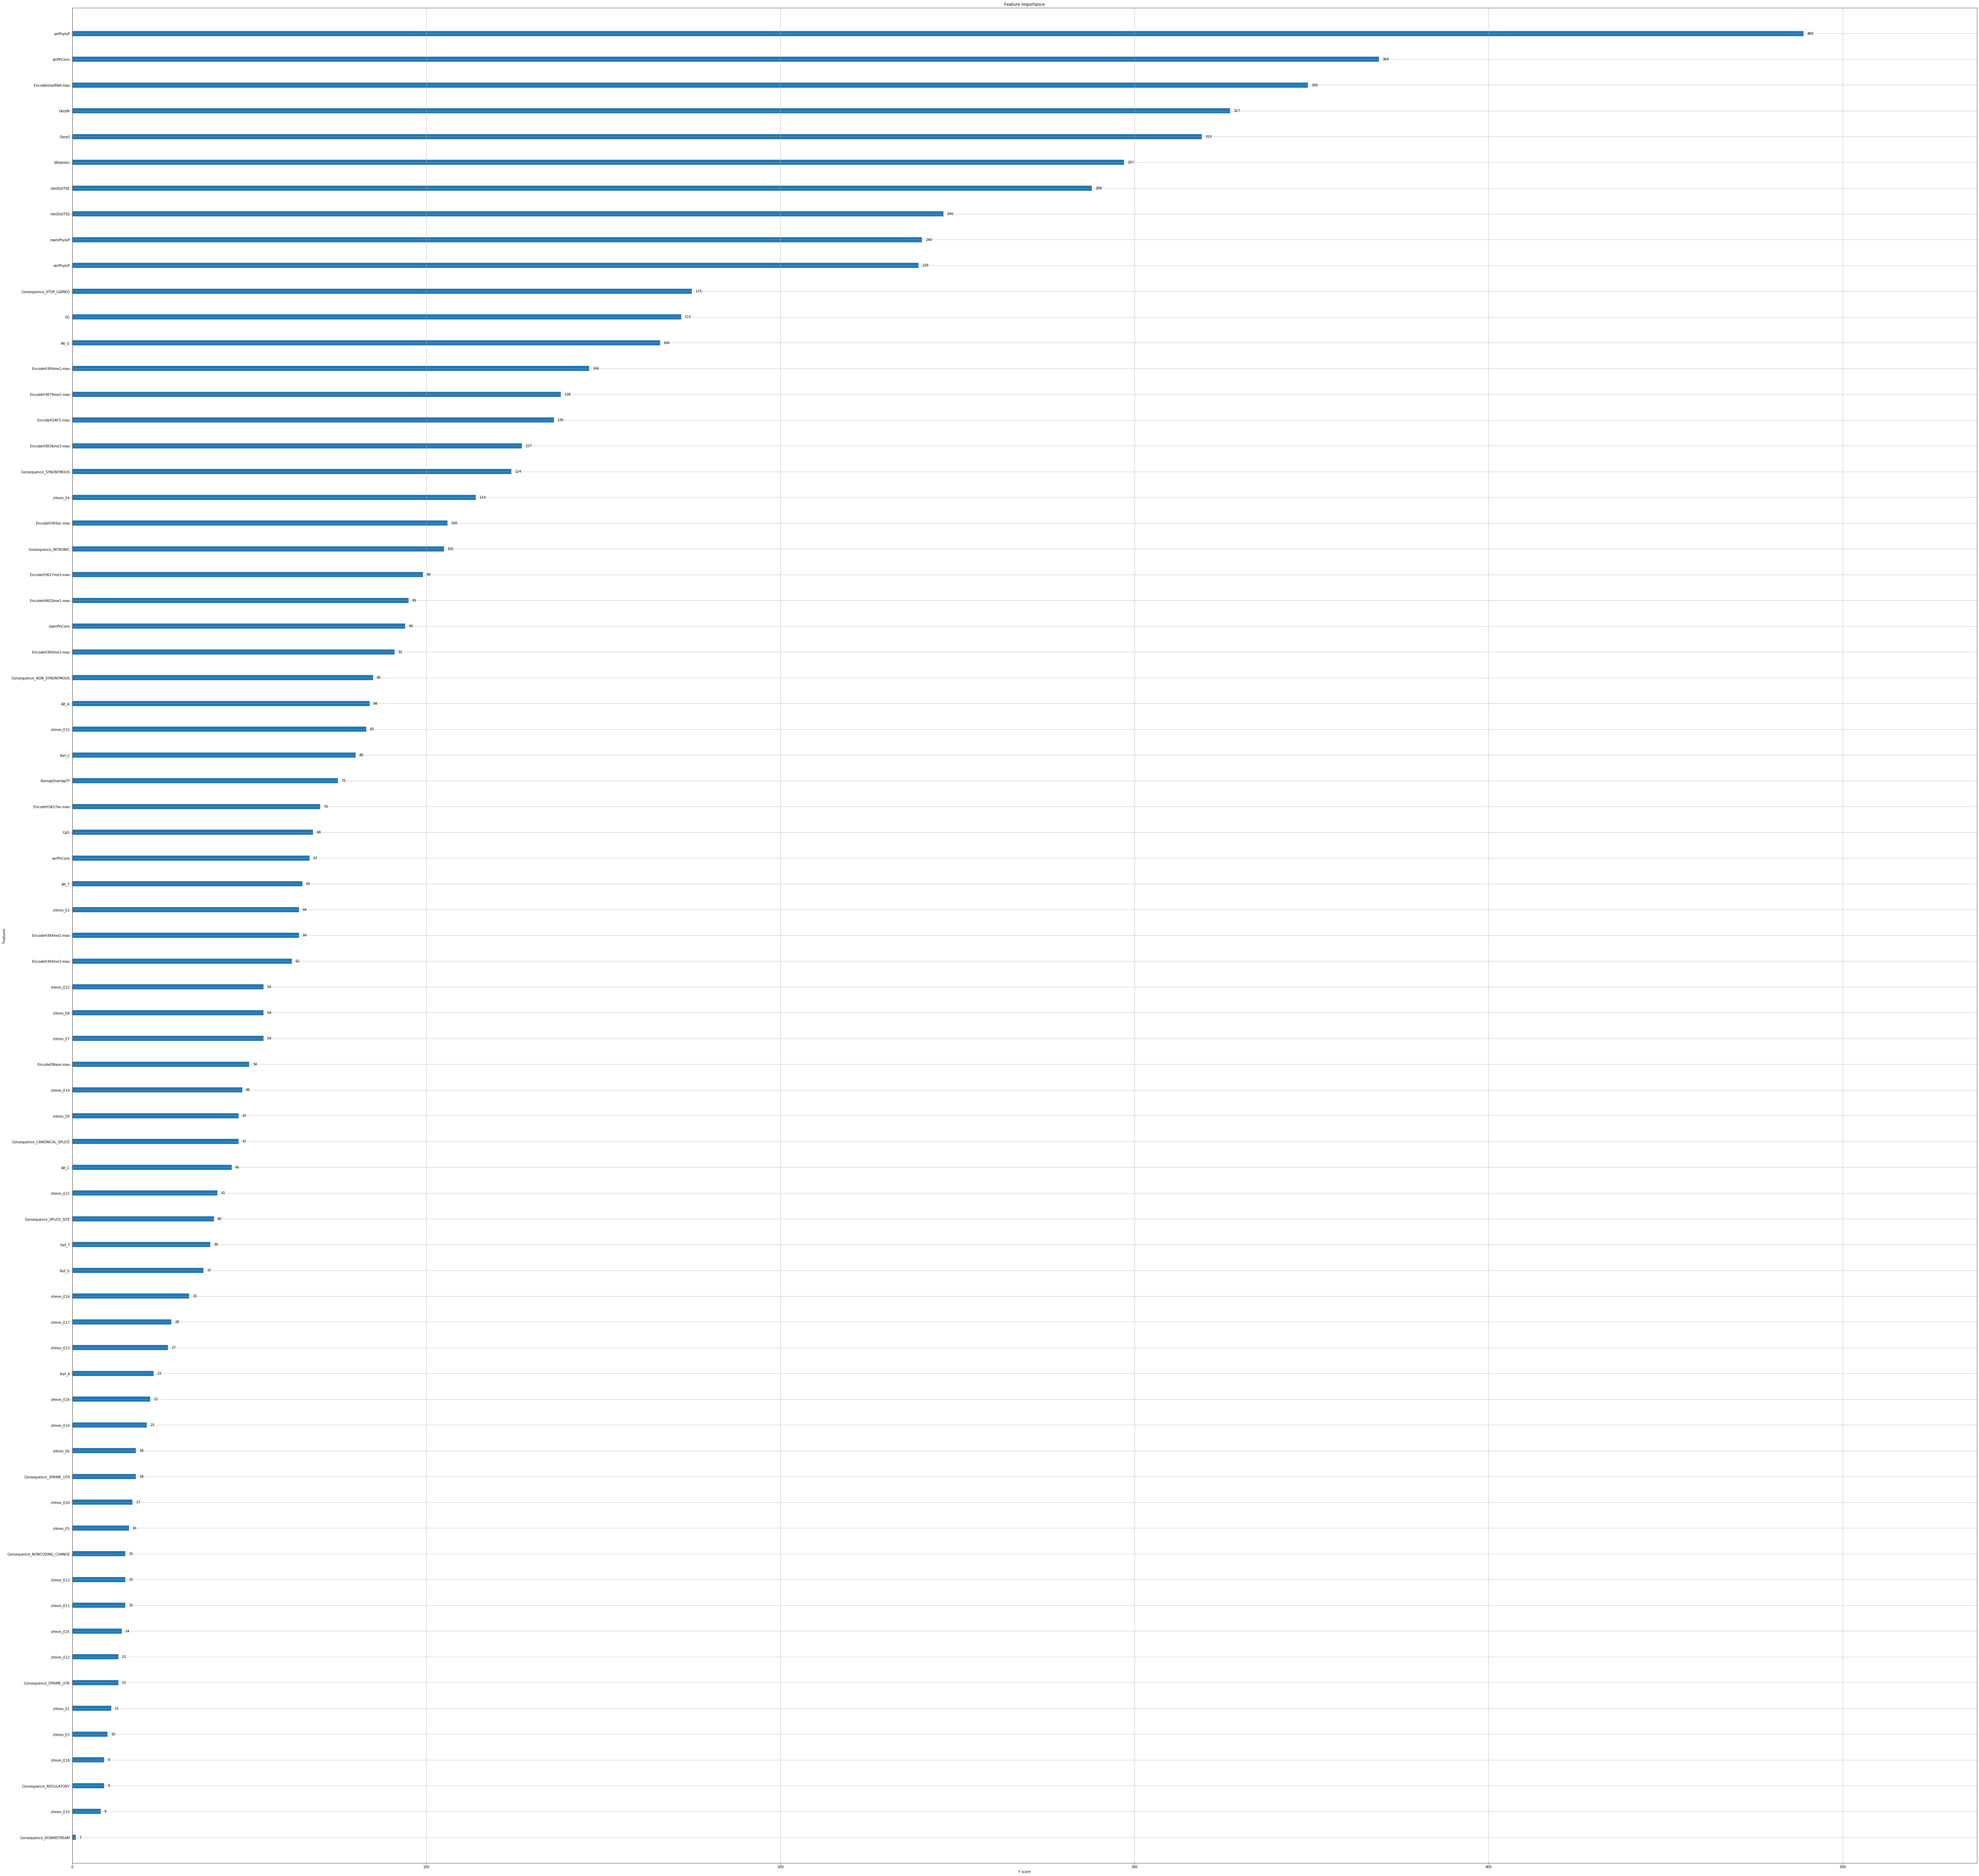

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.rcParams['figure.figsize'] = [ 20, 20]
plt.show()


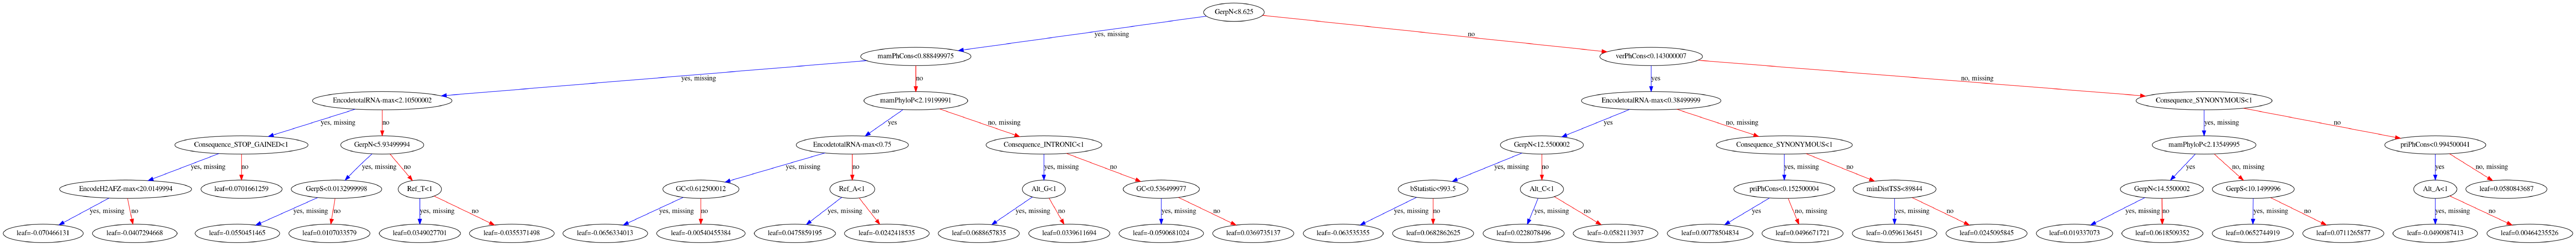

In [27]:
import xgboost as xgb

xgb.plot_tree(model,num_trees=10)
plt.rcParams['figure.figsize'] = [250, 100]
plt.show()

In [20]:
# Instantiate a HyperoptEstimator with the search space and number of evaluations

estim = HyperoptEstimator(classifier=random_forest({"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10),'n_jobs':10}),
                          preprocessing=[],
                          algo=tpe.suggest,
                          max_evals=10,
                          trial_timeout=300000)

'''
random_forest()
    Return a pyll graph with hyperparamters that will construct
    a sklearn.ensemble.RandomForestClassifier model.
    Args:
        criterion([str]): choose 'gini' or 'entropy'.
    See help(hpsklearn.components._trees_hp_space) for info on additional
    available random forest/extra trees arguments.
'''

"\nrandom_forest()\n    Return a pyll graph with hyperparamters that will construct\n    a sklearn.ensemble.RandomForestClassifier model.\n    Args:\n        criterion([str]): choose 'gini' or 'entropy'.\n    See help(hpsklearn.components._trees_hp_space) for info on additional\n    available random forest/extra trees arguments.\n"

In [21]:
# Search the hyperparameter space based on the data

estim.fit( X_train, Y_train )



  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

job exception: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,\n                9,\n            ...\n            83188, 83189, 83190, 83191, 83192, 83193, 83194, 83195, 83196,\n            83197],\n           dtype='int64', length=83198)] are in the [columns]"


  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]


KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,\n                9,\n            ...\n            83188, 83189, 83190, 83191, 83192, 83193, 83194, 83195, 83196,\n            83197],\n           dtype='int64', length=83198)] are in the [columns]"

In [18]:
# Show the results

print(estim.score(X_test, Y_test))
# 0.962785714286 



AttributeError: 'hyperopt_estimator' object has no attribute '_best_preprocs'

In [19]:
print(estim.best_model())


AttributeError: 'hyperopt_estimator' object has no attribute '_best_learner'

NameError: name 'hpsklearn' is not defined

In [ ]:
#Bayesian optimization
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [ ]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [ ]:
#Train model
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [ ]:
##xgboost later 

def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters